In [1]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")


In [2]:
#first, some numbers

#all data including non-suppress
dfi=pd.read_csv('data/sep2023-update/clean1-out.csv')
df = dfi[dfi['co']=='OPH'] #just select OPH for now

df_supp=pd.read_csv('data/sep2023-update/wideout.csv') #already only OPH right??

print('OPH all N=',len(df['master_ptid'].unique()))
print('OPH suppressed N=',len(df_supp['short_id'].unique()))



OPH all N= 120
OPH suppressed N= 55


In [3]:
#look at numbers of longitudinal followups
for dd in ['log10VL','cd4count','log10int']:
    followl=[]
    for p in df['master_ptid'].unique():
        tdf=df[df['master_ptid']==p][dd].dropna()
        
        if len(tdf)>0:
            followl.append(len(tdf))
        
    print(dd,np.median(followl),np.min(followl),np.max(followl))

    

log10VL 19.0 1 32
cd4count 11.0 1 24
log10int 5.0 1 10


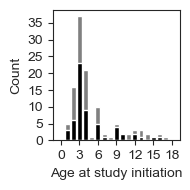

In [4]:
#plot ages of M/F in histogram

age_df = df.drop_duplicates(subset='master_ptid', keep='first') #unique entry for each participant when they have first observation

y,x = np.histogram(age_df['age_yr']*12,bins=np.arange(20))

yf,xf = np.histogram(age_df['age_yr'][age_df['infsex']=='Female']*12,bins=np.arange(20))

plt.figure(figsize=(2,2))
plt.bar(x[:-1],y,color='gray')
plt.bar(xf[:-1],yf,color='k')
plt.yticks(np.arange(0,40,5))
plt.xticks(np.arange(0,20,3))
plt.xlabel('Age at study initiation')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('figures/Nhist-original.pdf',dpi=600)

/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


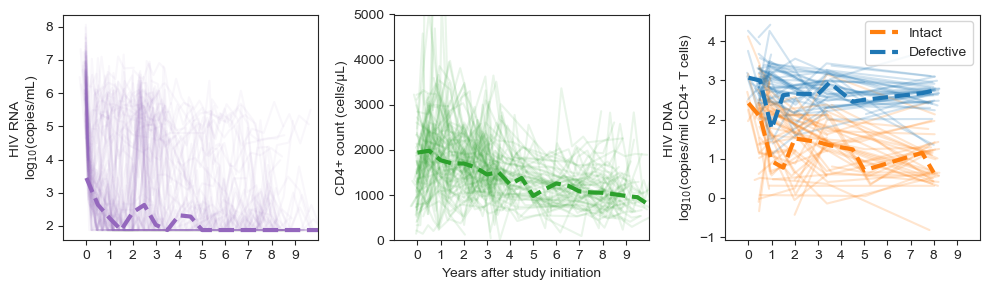

In [5]:
#look at OPH raw data

#get rolling medians, every 6mo?
mV=np.zeros(13*2); m4=np.zeros(13*2); mI=np.zeros(13*2); mD=np.zeros(13*2); tt=np.arange(13*2)/2
for ii in range(13*2):

    tdf = df[(df['ART_mo']>ii*6) & (df['ART_mo']<(ii+1)*6)]
    
    mV[ii]=np.nanmedian(tdf['log10VL'])
    m4[ii]=np.nanmedian(tdf['cd4count'])
    mI[ii]=np.nanmedian(tdf['log10int'])
    mD[ii]=np.nanmedian(tdf['log10def'])

plt.figure(figsize=(10,3))
for p in df['master_ptid'].unique():
    tdf=df[df['master_ptid']==p]
    plt.subplot(131)
    plt.plot(tdf['ART_mo']/12,tdf['log10VL'],color='tab:purple',alpha=0.05)#additional rules?

    plt.subplot(132)
    tdf=df[df['master_ptid']==p][['ART_mo','cd4count']].dropna()
    plt.plot(tdf['ART_mo']/12,tdf['cd4count'],color='tab:green',alpha=0.1)#additional rules?

    plt.subplot(133)
    tdf=df[df['master_ptid']==p].dropna()
    plt.plot(tdf['ART_mo']/12,tdf['log10int'],color='tab:orange',alpha=0.2)#additional rules?
    plt.plot(tdf['ART_mo']/12,tdf['log10def'],color='tab:blue',alpha=0.2)#additional rules?

plt.subplot(131)
plt.plot(tt,mV,color='tab:purple',lw=3,marker='',ls='--')
plt.xlim([-1,10])
plt.xticks(range(10))
plt.ylabel('HIV RNA \n' + r'log$_{10}$(copies/mL)')

plt.subplot(132)
plt.plot(tt,m4,color='tab:green',lw=3,marker='',ls='--')
plt.ylim([0,5000])
plt.xlim([-1,10])
plt.xticks(range(10))
plt.xlabel('Years after study initiation')
plt.ylabel('CD4+ count (cells/µL)')

plt.subplot(133)
plt.plot(tt[mI>0],mI[mI>0],color='tab:orange',lw=3,marker='',label='Intact',ls='--')
plt.plot(tt[mD>0],mD[mD>0],color='tab:blue',lw=3,marker='',label='Defective',ls='--')
plt.xlim([-1,10])
plt.xticks(range(10))
plt.ylabel('HIV DNA \n' + r'log$_{10}$(copies/mil CD4+ T cells)')
plt.legend()

plt.tight_layout()
plt.savefig('figures/raw-wmedians.pdf',dpi=600)

/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/dreeves/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


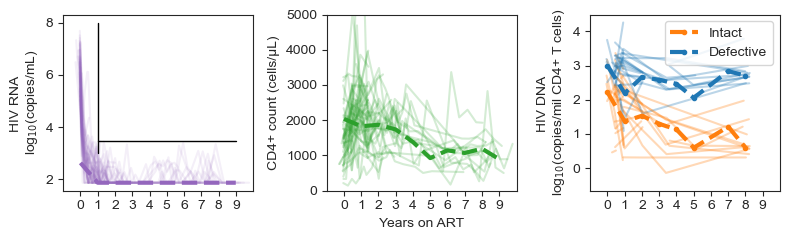

In [6]:
#read in data (suppressed)
#df=pd.read_csv('data/sep2023-update/wideout.csv')#,index=False)

N=len(df['short_id'].unique())
plt.figure(figsize=(8,2.5))

agel=[]; yrsfollow=[]; mfl=[]; nl=[]
plt.subplot(131)
for p in df_supp['short_id'].unique():
    tdf=df_supp[df_supp['short_id']==p]
    
    plt.plot(tdf['time_ART_mo']/12,tdf['log10VL'],color='tab:purple',alpha=0.1,marker='')#additional rules?
    
    #keep track of info
    agel.append(tdf['agemo_at_ART'].iloc[0])
    yrsfollow.append((tdf['time_ART_mo'].iloc[-1]-tdf['time_ART_mo'].iloc[0])/12)
    mfl.append(tdf['f/m'].iloc[0])
    nl.append([len(tdf['log10VL'].dropna()),len(tdf['log10CD4'].dropna()),len(tdf['log10int'].dropna())])

plt.annotate('VL lod',[90,np.log10(150)],color='k')
plt.ylabel('HIV RNA \n' + r'log$_{10}$(copies/mL)')

#add exclusion criteria lines
plt.plot([1,1],[3,8],color='k',lw=1)
plt.plot([1,9],[np.log10(3000),np.log10(3000)],color='k',lw=1)
plt.annotate('Criteria: \n Under 1000 by 1yr \n Remain under 3000',[18,3.8])
plt.xticks(np.arange(0,121,12))

#plot cd4 count from all
plt.subplot(132)
for p in df_supp['short_id'].unique():
    tdf=df_supp[df_supp['short_id']==p][['time_ART_mo','log10CD4']].dropna()
    plt.plot(tdf['time_ART_mo']/12,10**tdf['log10CD4'],color='tab:green',marker='',alpha=0.2)#additional rules?
plt.ylim([0,5000])
plt.xlabel('Years on ART')

#plot reservoir from all
plt.subplot(133)
for p in df_supp['short_id'].unique():
    tdf=df_supp[df_supp['short_id']==p].dropna()
    plt.plot(tdf['time_ART_mo']/12,tdf['log10int'],color='tab:orange',marker='',alpha=0.3)#additional rules?
    plt.plot(tdf['time_ART_mo']/12,tdf['log10def'],color='tab:blue',marker='',alpha=0.3)#additional rules?

#add medians?
mV=np.zeros(13); m4=np.zeros(13); mI=np.zeros(13); mD=np.zeros(13); tt=np.arange(13)
for ii in range(13):

    tdf = df_supp[(df_supp['time_ART_mo']>ii*12) & (df_supp['time_ART_mo']<(ii+1)*12)]
    
    mV[ii]=np.nanmedian(tdf['log10VL'])
    m4[ii]=np.nanmedian(10**tdf['log10CD4'])
    mI[ii]=np.nanmedian(tdf['log10int'])
    mD[ii]=np.nanmedian(tdf['log10def'])

plt.subplot(131)
plt.plot(tt,mV,color='tab:purple',lw=3,marker='',ls='--')
plt.xlim([-1,10])
plt.xticks(range(10))
plt.ylabel('HIV RNA \n' + r'log$_{10}$(copies/mL)')

plt.subplot(132)
plt.plot(tt,m4,color='tab:green',lw=3,marker='',ls='--')
plt.ylim([0,5000])
plt.xlim([-1,10])
plt.xticks(range(10))
plt.ylabel('CD4+ count (cells/µL)')

plt.subplot(133)
plt.plot(tt[mI>0],mI[mI>0],color='tab:orange',lw=3,marker='.',label='Intact',ls='--')
plt.plot(tt[mD>0],mD[mD>0],color='tab:blue',lw=3,marker='.',label='Defective',ls='--')
plt.xlim([-1,10])
plt.xticks(range(10))
plt.ylabel('HIV DNA \n' + r'log$_{10}$(copies/mil CD4+ T cells)')
plt.legend()

plt.tight_layout()

plt.savefig('figures/raw-suppressed.pdf',dpi=600)

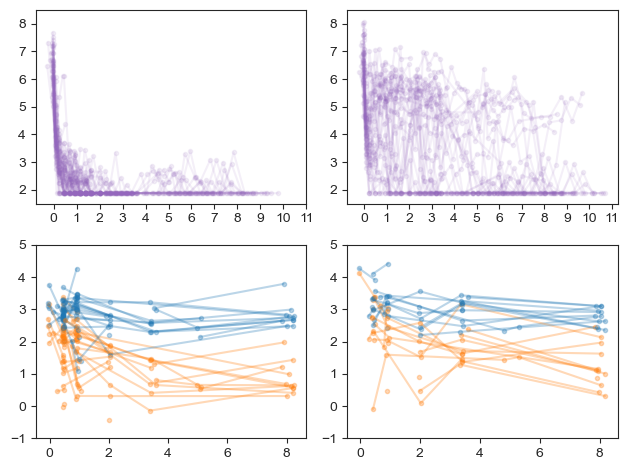

In [87]:
#plot viral loads for suppressed and non suppressed

for p in df['short_id'].unique():
    

    if p in list(df_supp['short_id']):
        tdf=df_supp[df_supp['short_id']==p]
        plt.subplot(221)
        plt.plot(tdf['time_ART_mo']/12,tdf['log10VL'],color='tab:purple',alpha=0.1,marker='.')#additional rules?
        plt.ylim([1.5,8.5])
        plt.yticks(np.arange(2,9))
        plt.xticks(np.arange(0,12,1))

        tdf=df_supp[df_supp['short_id']==p].dropna()
        plt.subplot(223)
        plt.plot(tdf['time_ART_mo']/12,tdf['log10int'],color='tab:orange',alpha=0.3,marker='.')#additional rules?
        plt.plot(tdf['time_ART_mo']/12,tdf['log10def'],color='tab:blue',alpha=0.3,marker='.')#additional rules?
        plt.ylim([-1,5])
        
        
    else:
        tdf=df[df['short_id']==p]    
        plt.subplot(222)
        plt.plot(tdf['ART_mo']/12,tdf['log10VL'],color='tab:purple',alpha=0.1,marker='.')#additional rules?
        plt.ylim([1.5,8.5])
        plt.yticks(np.arange(2,9))
        plt.xticks(np.arange(0,12,1))

        tdf=df[df['short_id']==p].dropna()
        plt.subplot(224)
        plt.plot(tdf['ART_mo']/12,tdf['log10int'],color='tab:orange',alpha=0.3,marker='.')#additional rules?
        plt.plot(tdf['ART_mo']/12,tdf['log10def'],color='tab:blue',alpha=0.3,marker='.')#additional rules?
        plt.ylim([-1,5])
        
    
'''plt.subplot(223)
xI = df_supp[['time_ART_mo','log10int']].dropna()
sns.regplot(xI['time_ART_mo']/12,xI['log10int'],color='tab:orange',marker='')
xI = df_supp[['time_ART_mo','log10def']].dropna()
sns.regplot(xI['time_ART_mo']/12,xI['log10def'],color='tab:blue',marker='')

plt.subplot(224)
xI = df[['ART_mo','log10int']].dropna()
sns.regplot(xI['ART_mo']/12,xI['log10int'],color='tab:orange',marker='')
xI = df[['ART_mo','log10def']].dropna()
sns.regplot(xI['ART_mo']/12,xI['log10def'],color='tab:blue',marker='')
'''#plt.annotate('VL lod',[90,np.log10(150)],color='k')
#plt.ylabel('HIV RNA \n' + r'log$_{10}$(copies/mL)')

plt.tight_layout()

plt.savefig('figures/subsetting.pdf',dpi=600)

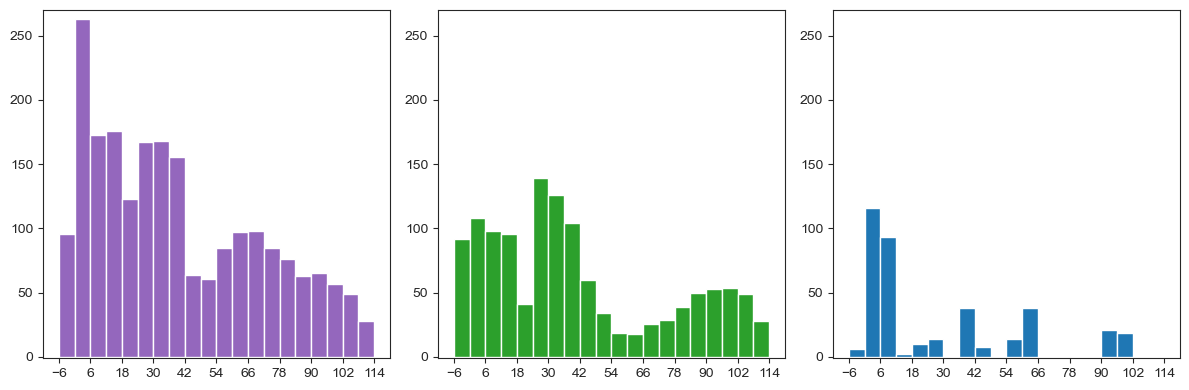

In [82]:
#time points:

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.hist(df[['ART_mo','log10VL']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:purple')
plt.ylim([-1,270])
plt.xticks(np.arange(-6,120,12))

plt.subplot(132)
plt.hist(df[['ART_mo','cd4count']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:green')
plt.ylim([-1,270])
plt.xticks(np.arange(-6,120,12))

plt.subplot(133)
plt.hist(df[['ART_mo','log10def']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:blue')
#plt.hist(df[['ART_mo','log10int']].dropna()['ART_mo'],bins=np.arange(-6,120,6),color='tab:orange')
#plt.hist(df[['ART_mo','log10int']].dropna()['ART_mo'],bins=[-6,0,6,24,48,72,120],color='tab:orange')
plt.ylim([-1,270])
plt.xticks(np.arange(-6,120,12))
#print()

plt.tight_layout()

plt.savefig('figures/numbersamples.pdf',dpi=600)

In [95]:
#number of participants with time > X

for tfollowup in [-10,12,24,40,60,90]:
    print(tfollowup,len(df[df['ART_mo']>tfollowup]['short_id'].unique()))


-10 120
12 95
24 92
40 75
60 60
90 57


In [93]:
#suppressed...

for tfollowup in [12,24,40,60,90]:
    print(tfollowup,len(df_supp[df_supp['time_ART_mo']>tfollowup]['short_id'].unique()))


12 47
24 27
40 16
60 14
90 12


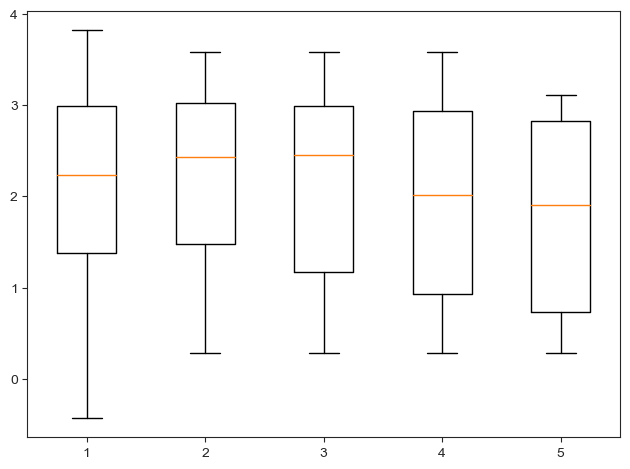

In [102]:
#initial HIV DNA sizes of people who make it through all followup?
tfollowup=60
vll=[]
for itf, tfollowup in enumerate([12,24,40,60,90]):
    vll.append([])
    
    for p in df_supp[df_supp['time_ART_mo']>tfollowup]['short_id'].unique():

        tdf = df_supp[df_supp['short_id']==p]

        vll[itf].append(tdf['log10int'].dropna().iloc[0])
        
plt.boxplot(vll) ##this includes the same people in multiple boxes

plt.tight_layout()

In [75]:
np.histogram(df[['ART_mo','log10def']].dropna()['ART_mo'],bins=np.arange(-6,120,6))


(array([  6, 116,  93,   2,  10,  14,   0,  38,   8,   0,  14,  38,   0,
          0,   0,   0,  21,  19,   0,   0]),
 array([ -6,   0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,
         72,  78,  84,  90,  96, 102, 108, 114]))

In [80]:
#roughly preART, 6mo 12mo 2year, 4year, 5year, 8yr

np.histogram(df[['ART_mo','log10def']].dropna()['ART_mo'],bins=[-6,0,6,12,30,50,72,120])


(array([  6, 116,  93,  26,  46,  52,  40]),
 array([ -6,   0,   6,  12,  30,  50,  72, 120]))

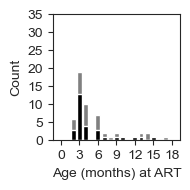

In [18]:
#plot numbers
y,x = np.histogram(agel,bins=np.arange(20))

yf,xf = np.histogram(np.array(agel)[np.array(mfl)==0],bins=np.arange(20))

plt.figure(figsize=(2,2))
plt.bar(x[:-1],y,color='gray')
plt.bar(xf[:-1],yf,color='k')
plt.yticks(np.arange(0,40,5))
plt.xticks(np.arange(0,20,3))
plt.xlabel('Age (months) at ART')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('figures/Nhist-good.pdf',dpi=600)

In [19]:
#super simple analysis comparing DNA from suppressed vs excluded (before and after 1 year?)

df['ART_mo']['log10int']

Index(['Unnamed: 0', 'master_ptid', 'enrollcohort', 'infsex',
       'haart_start_sregimen', 'ART_mo', 'age_yr', 'vload', 'cd4count',
       'total_hivdna_persist2020', 'intact_hivdna_persist2020',
       'tot_tcells_persist2020', 'cens_vl', 'cens_intact', 'intact_corrected',
       'short_id', 'co', 'log10VL', 'log10tot', 'log10int', 'log10def'],
      dtype='object')

In [21]:
df_supp['short_id'].unique()

array([  1,   3,   4,   5,   7,  10,  12,  19,  20,  22,  27,  28,  29,
        31,  34,  35,  46,  47,  49,  50,  55,  57,  60,  62,  66,  67,
        73,  74,  75,  76,  78,  80,  83,  88,  97,  98, 101, 102, 105,
       108, 109, 110, 116, 117, 120, 122, 124, 125, 126, 129, 130, 132,
       133, 134, 139])

In [54]:
#not suppressed people
df_ns=pd.DataFrame()
for sid in df['short_id'].unique():
    
    if sid not in df_supp['short_id'].unique():
        tdf = df[df['short_id']==sid]
    else:
        df_ns = df_ns._append(tdf)
    

MannwhitneyuResult(statistic=1674.0, pvalue=2.3086990598151435e-06)
MannwhitneyuResult(statistic=519.0, pvalue=3.995014118074769e-06)
MannwhitneyuResult(statistic=1914.0, pvalue=7.121134705287826e-05)
MannwhitneyuResult(statistic=439.0, pvalue=2.002430149130688e-07)


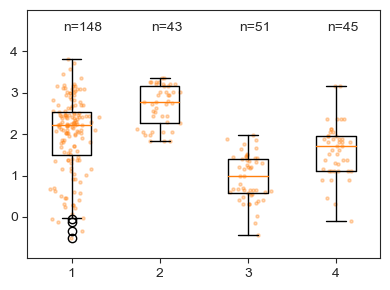

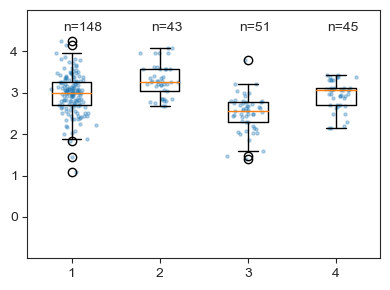

In [73]:
#do comparison between supp and not supp people HIV DNA

for i in range(2):
    obs=['log10int','log10def'][i]; 
    cz=['tab:orange','tab:blue'][i]

    s_l1 = df_supp[df_supp['time_ART_mo']<12][obs].dropna()
    s_g1 = df_supp[df_supp['time_ART_mo']>12][obs].dropna()

    ns_l1 = df_ns[df_ns['ART_mo']<12][obs].dropna() 
    ns_g1 = df_ns[df_ns['ART_mo']>12][obs].dropna() 

    dl=[s_l1,ns_l1,s_g1,ns_g1]#,pb] #list of data

    plt.figure(figsize=(4,3))
    for idl,d in enumerate(dl):
        plt.scatter(np.random.normal(1,0.1,len(d))+idl,d,color=cz,alpha=0.3,s=5)
        plt.annotate('n='+str(len(d)),[idl+0.9,4.5],)

    plt.boxplot(dl)
    plt.yticks(np.arange(5))
    plt.ylim([-1,5])
    #plt.xticks(np.arange(len(dl))+1,['Suppressed <1 yr','Not-suppressed <1 yr','Suppressed >1 yr','Not-suppressed >1 yr'],rotation=90)
    #plt.xlabel('Time points')
    #plt.ylabel(obs)

    print(st.mannwhitneyu(s_l1,ns_l1))
    print(st.mannwhitneyu(s_g1,ns_g1))

    plt.tight_layout()
    plt.savefig('figures/simple-excludeDNA'+obs+'.pdf',dpi=600)


MannwhitneyuResult(statistic=1122.0, pvalue=0.1881783194119543)
MannwhitneyuResult(statistic=164.0, pvalue=0.6135335421794746)
MannwhitneyuResult(statistic=1101.0, pvalue=0.2533801965170598)
MannwhitneyuResult(statistic=91.0, pvalue=0.018853377367019163)


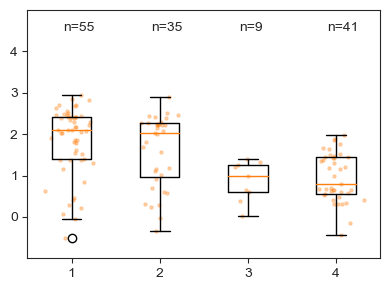

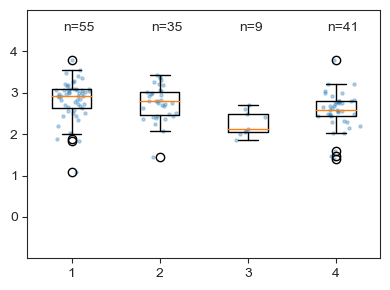

In [74]:
#now do comparison within supp vs undetectable supp

for i in range(2):
    obs=['log10int','log10def'][i]; 
    cz=['tab:orange','tab:blue'][i]
    
    s_l1 = df_supp[(df_supp['time_ART_mo']<12) & (df_supp['log10VL']<3) & (df_supp['log10VL']>2)][obs].dropna()
    u_l1 = df_supp[(df_supp['time_ART_mo']<12) & (df_supp['log10VL']<2)][obs].dropna()

    s_g1 = df_supp[(df_supp['time_ART_mo']>12) & (df_supp['log10VL']<3) & (df_supp['log10VL']>2)][obs].dropna()
    u_g1 = df_supp[(df_supp['time_ART_mo']>12) & (df_supp['log10VL']<2)][obs].dropna()

    dl=[s_l1,u_l1,s_g1,u_g1]#,pb] #list of data

    plt.figure(figsize=(4,3))
    for idl,d in enumerate(dl):
        plt.scatter(np.random.normal(1,0.1,len(d))+idl,d,color=cz,alpha=0.3,s=5)

        plt.annotate('n='+str(len(d)),[idl+0.9,4.5],)
        
    plt.boxplot(dl)
    plt.yticks(np.arange(5))
    plt.ylim([-1,5])
    #plt.xticks(np.arange(len(dl))+1,['Suppressed <1 yr','Not-suppressed <1 yr','Suppressed >1 yr','Not-suppressed >1 yr'],rotation=90)
    #plt.xlabel('Time points')
    #plt.ylabel(obs)

    print(st.mannwhitneyu(s_l1,u_l1))
    print(st.mannwhitneyu(s_g1,u_g1))

    plt.tight_layout()
    plt.savefig('figures/simple-suppvsundetect'+obs+'.pdf',dpi=600)
